In [1]:
from math import dist
import numpy as np
import pandas as pd
import os
from pyparsing import col

from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.neighbors import NearestNeighbors

# from umap import UMAP #pip3 install umap-learn

import csv
import seaborn as sns
from collections import OrderedDict
from functools import partial
from time import time
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage

Axes3D

import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(100000)
print(sys.getrecursionlimit())

3000
100000


In [2]:
directory = os.getcwd()

print(directory)

/Users/sweintraub/Documents/WPI/Young/data/comparative_dh/unsupervisedClustering


In [3]:
data = pd.read_csv('../output/sigDEGS_yl.csv')
# data.rename(columns = {data.columns[0]: "proteinId"}, inplace = True)
print(data)
print(data.shape)

      proteinId        cont      cont.1      cont.2        lowN      lowN.1  \
0         10035   30.711830  105.587097   48.427124   11.680487   34.972676   
1         10044   40.410303  146.024709   95.212650    3.593996   17.486338   
2        100462  550.388322  700.918604  503.149608  336.038628  522.749472   
3        100727   15.355915    6.739602   17.236773   83.560407   14.725337   
4        100742  290.954179  193.201923  261.013989  557.967882  239.286730   
...         ...         ...         ...         ...         ...         ...   
3466      98159  186.695598  301.035554  245.418814  193.177286  126.085700   
3467      99380  375.815815  233.639535  297.949931  575.039363  346.965759   
3468      99434   45.259539   47.177214   43.502332   33.244463   32.211675   
3469      99519  351.569633  188.708855  282.354756  545.388895  484.095462   
3470      99542    5.657442    2.246534    8.207987    5.390994    9.203336   

          lowN.2        salt       salt.1       sal

In [4]:
features = ['cont', 'cont.1', 'cont.2', 'lowN', 'lowN.1', 'lowN.2', 'salt', 'salt.1', 'salt.2', 'lowFE', 'lowFE.1', 'lowFE.2']

counts = data.loc[:,features].values
proteinId = data.loc[:,['proteinId']]

print(counts.shape)
print(proteinId.shape)

counts

(3471, 12)
(3471, 1)


array([[ 30.71183003, 105.5870975 ,  48.42712378, ...,  32.08318291,
         47.71823822,  35.25046568],
       [ 40.41030267, 146.0247093 ,  95.21265014, ...,   4.37497949,
          5.96477978,   5.87507761],
       [550.3883224 , 700.9186044 , 503.1496081 , ..., 466.6644787 ,
        486.1295518 , 423.9847678 ],
       ...,
       [ 45.25953899,  47.17721376,  43.50233153, ...,  24.79155043,
         17.89433933,  22.52113085],
       [351.5696332 , 188.708855  , 282.3547556 , ..., 577.4972924 ,
        619.7406189 , 657.0295131 ],
       [  5.65744237,   2.24653399,   8.20798708, ...,  11.66661197,
          4.77182382,   1.95835921]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

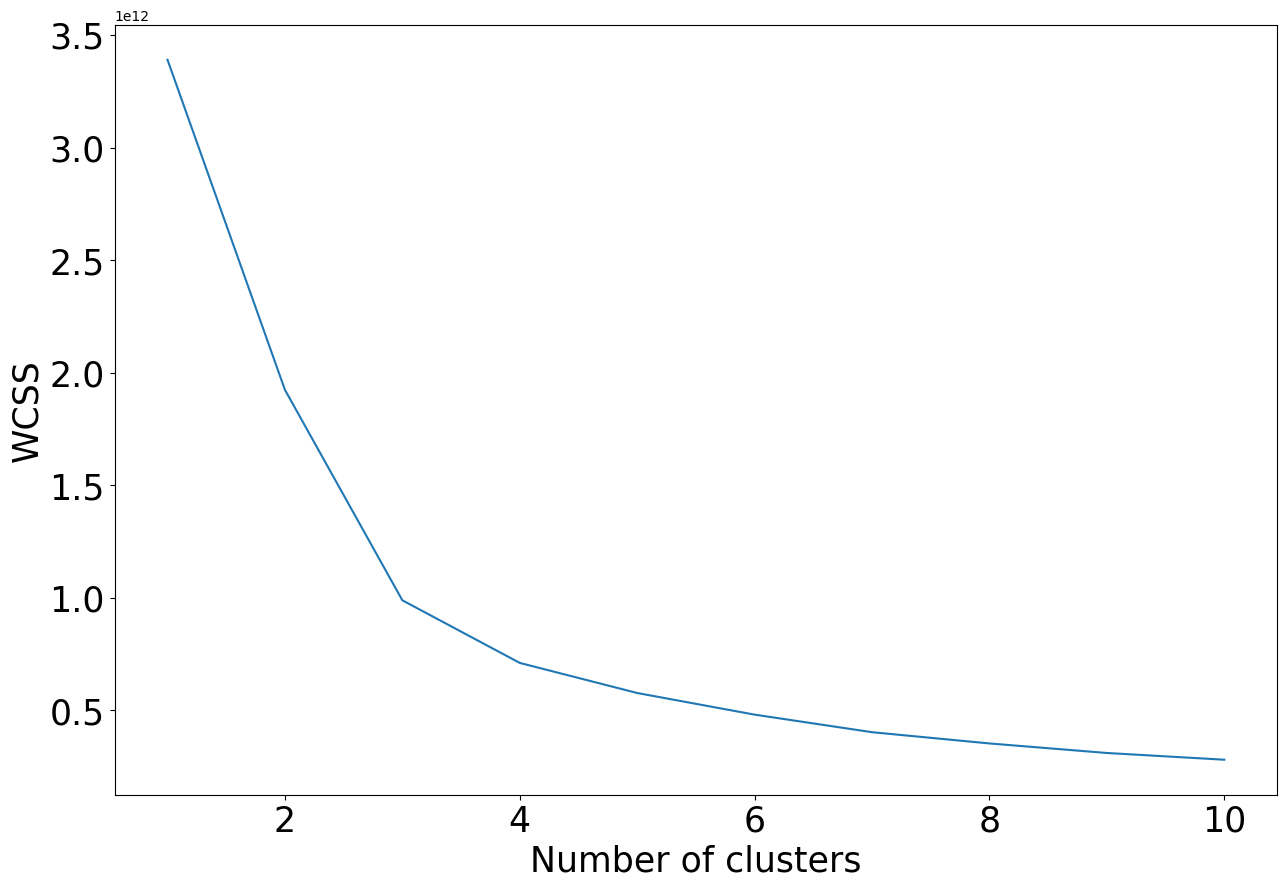

In [5]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++", random_state=3009)
   model.fit(counts)
   wcss.append(model.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters',fontsize=25)
plt.ylabel('WCSS',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig('WCSS_yl.pdf')

 It looks like we can do 4-8 clusters

In [6]:
pca = PCA(2)
counts_transformed = pca.fit_transform(counts)

<BarContainer object of 2 artists>

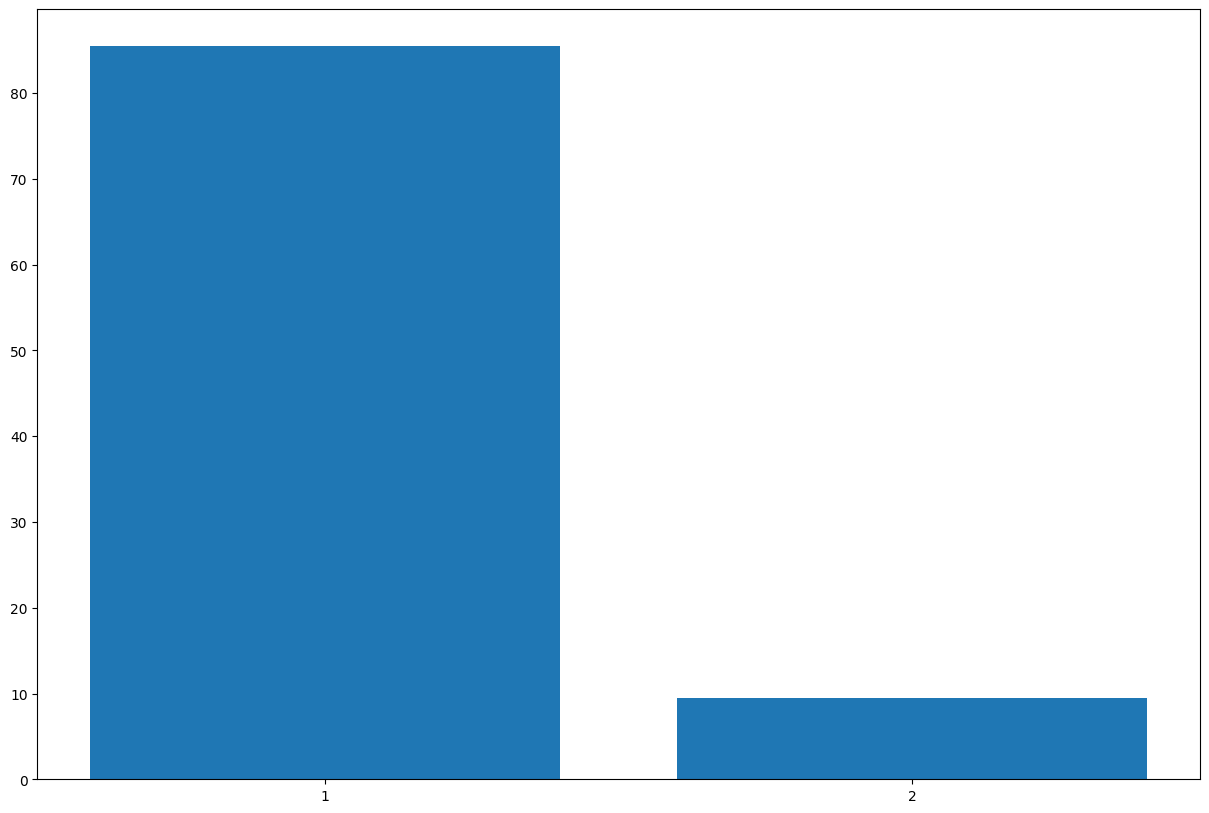

In [7]:
plt.figure(figsize=(15,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(counts) for counts in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)

In [8]:
df = data.set_index('proteinId')
# df

In [9]:
conditions = list(df.columns.values) 

# conditions

In [10]:
proteinIds = list(df.index)
# proteinIds

 # PCA by proteinID

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 has 3268 genes
Cluster 1 has 1 genes
Cluster 2 has 173 genes
Cluster 3 has 29 genes


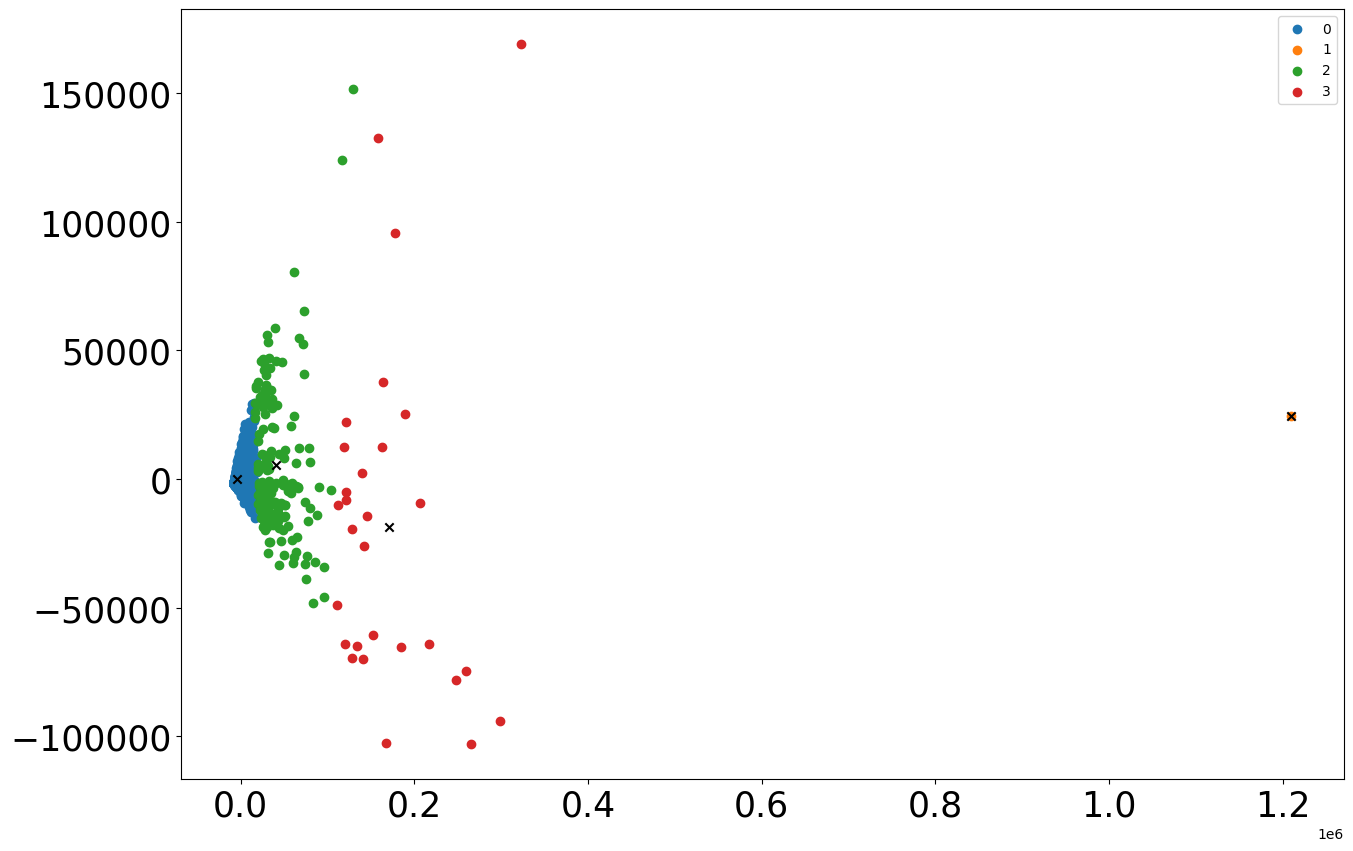

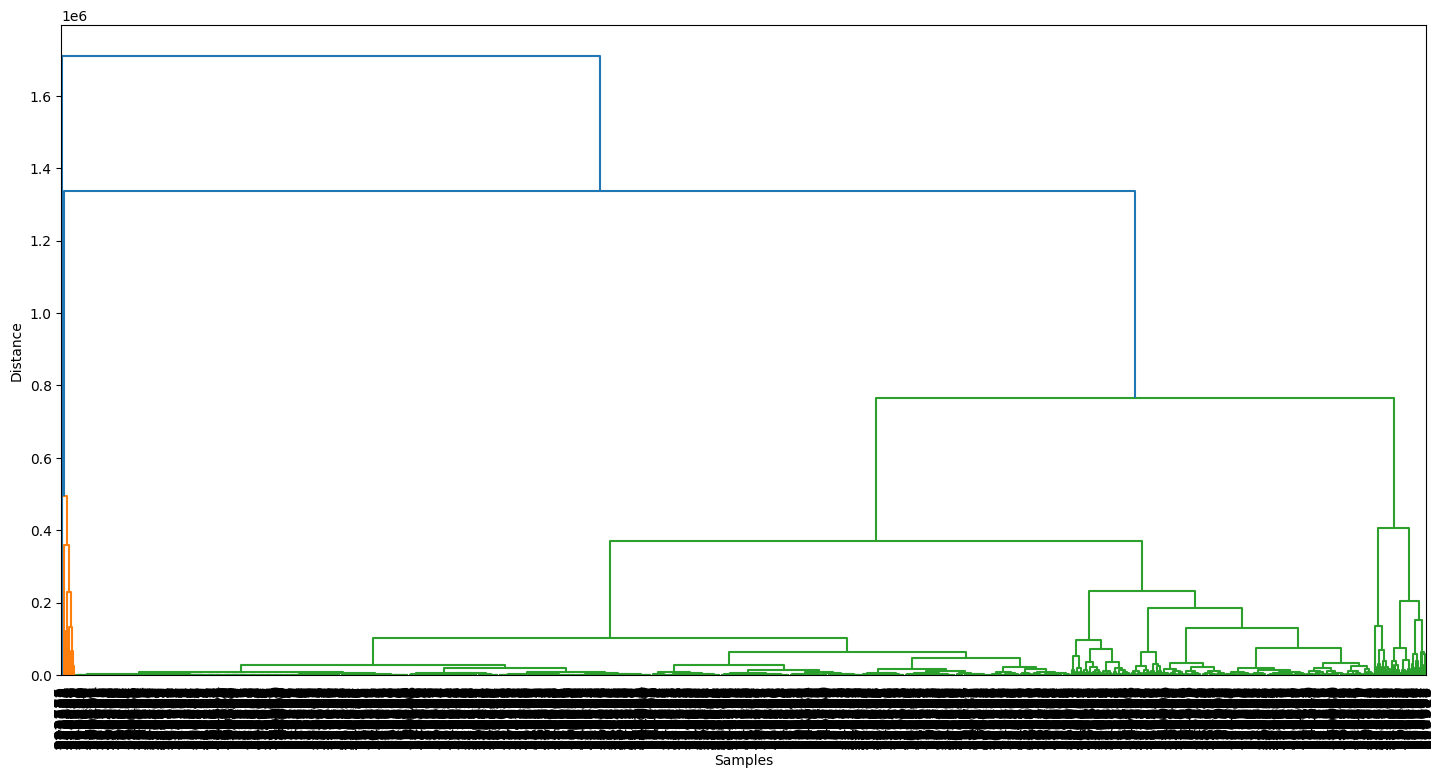

In [11]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan")
label = model.fit_predict(counts_transformed)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(counts_transformed[label == i , 0] , counts_transformed[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()


counts = df.values
cluster_samples = linkage(counts_transformed, method='ward', metric='euclidean')

plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(cluster_samples, 
    leaf_rotation=90., 
    leaf_font_size=12., 
    labels=proteinIds, 
    )

plt.savefig('dendrogram_samples_yl_n4.pdf')

cluster0 = counts_transformed[label == 0]
print("Cluster 0 has", len(cluster0), "genes", sep = " ")

cluster1 = counts_transformed[label == 1]
print("Cluster 1 has", len(cluster1), "genes", sep = " ")

cluster2 = counts_transformed[label == 2]
print("Cluster 2 has", len(cluster2), "genes", sep = " ")

cluster3 = counts_transformed[label == 3]
print("Cluster 3 has", len(cluster3), "genes", sep = " ")

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 4 has 2146 genes
Cluster 5 has 186 genes
Cluster 6 has 181 genes
Cluster 7 has 755 genes


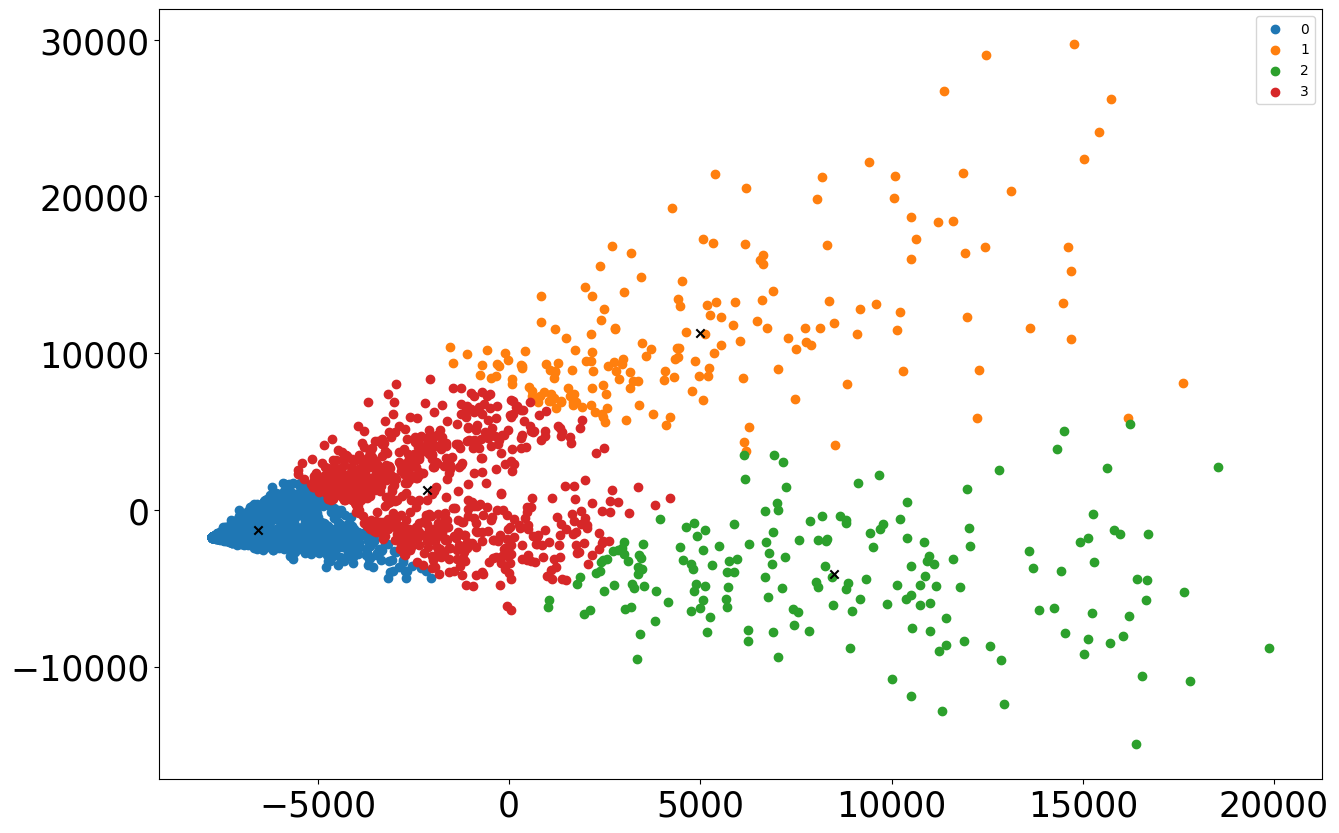

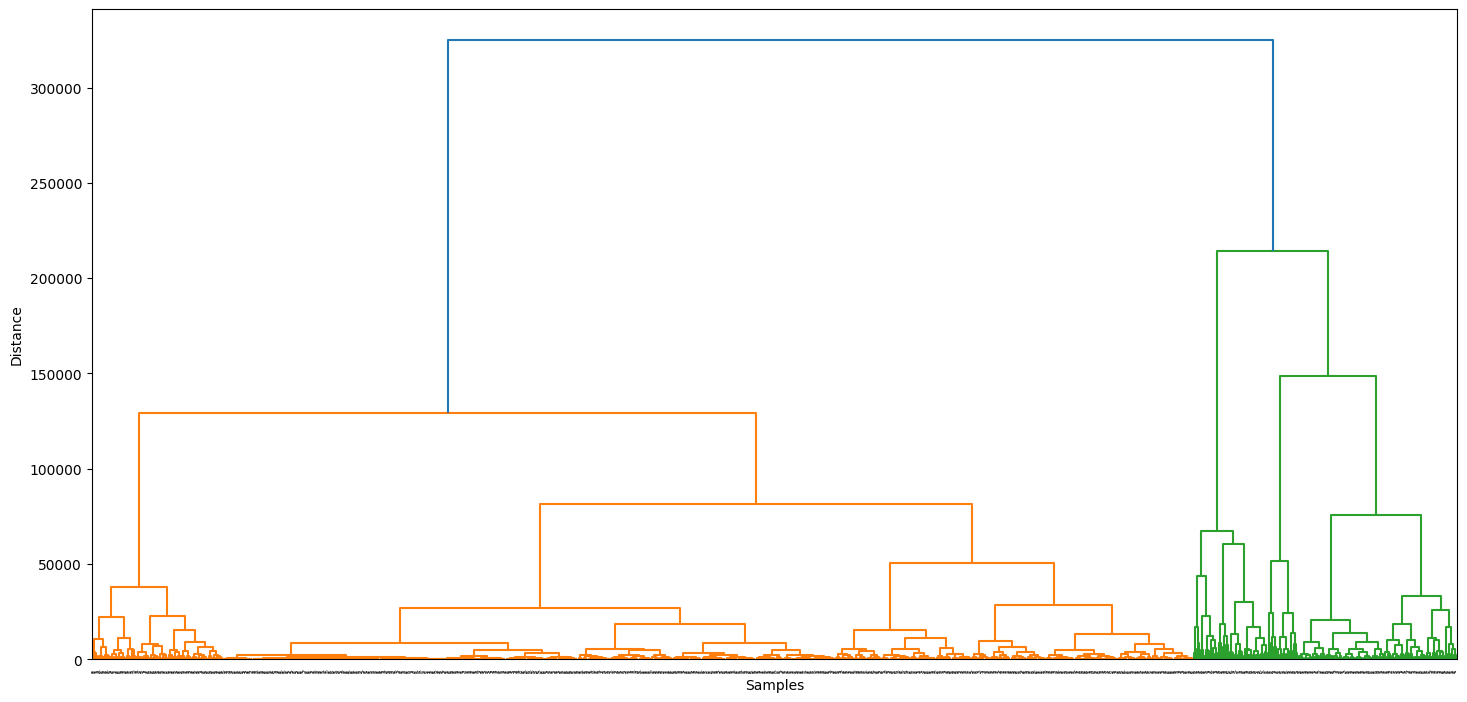

In [12]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(cluster0)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cluster0[label == i , 0] , cluster0[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()
plt.savefig('kmeans_elkan_4_yl.pdf')

cluster0_samples = linkage(cluster0, method='ward', metric='euclidean')

plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(cluster0_samples, leaf_rotation=90., leaf_font_size=1.)
plt.savefig('dendrogram0_4_samples_yl.pdf')

cluster4 = cluster0[label == 0]
print("Cluster 4 has", len(cluster4), "genes", sep = " ")

cluster5 = cluster0[label == 1]
print("Cluster 5 has", len(cluster5), "genes", sep = " ")

cluster6 = cluster0[label == 2]
print("Cluster 6 has", len(cluster6), "genes", sep = " ")

cluster7 = cluster0[label == 3]
print("Cluster 7 has", len(cluster7), "genes", sep = " ")

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 8 has 609 genes
Cluster 9 has 266 genes
Cluster 10 has 909 genes
Cluster 11 has 362 genes


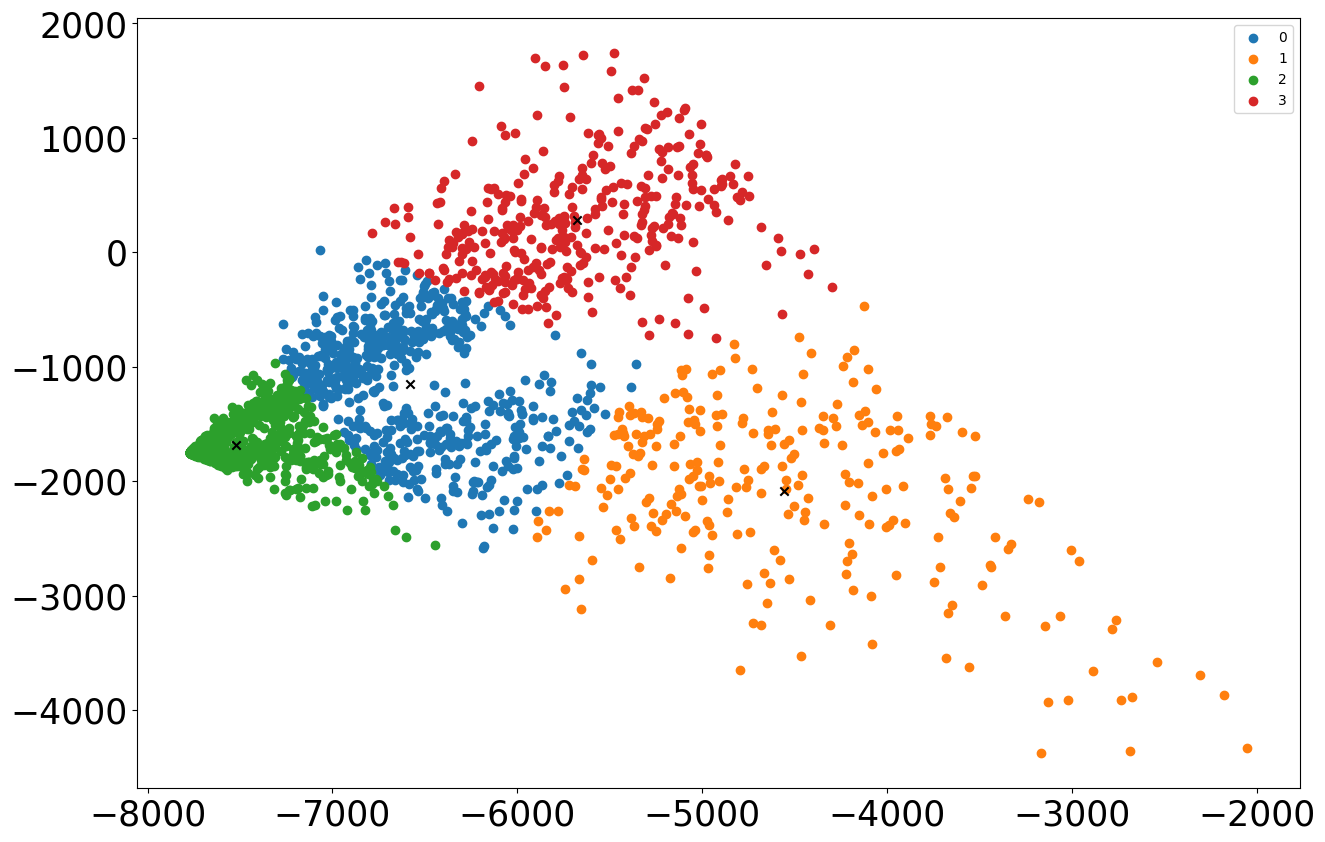

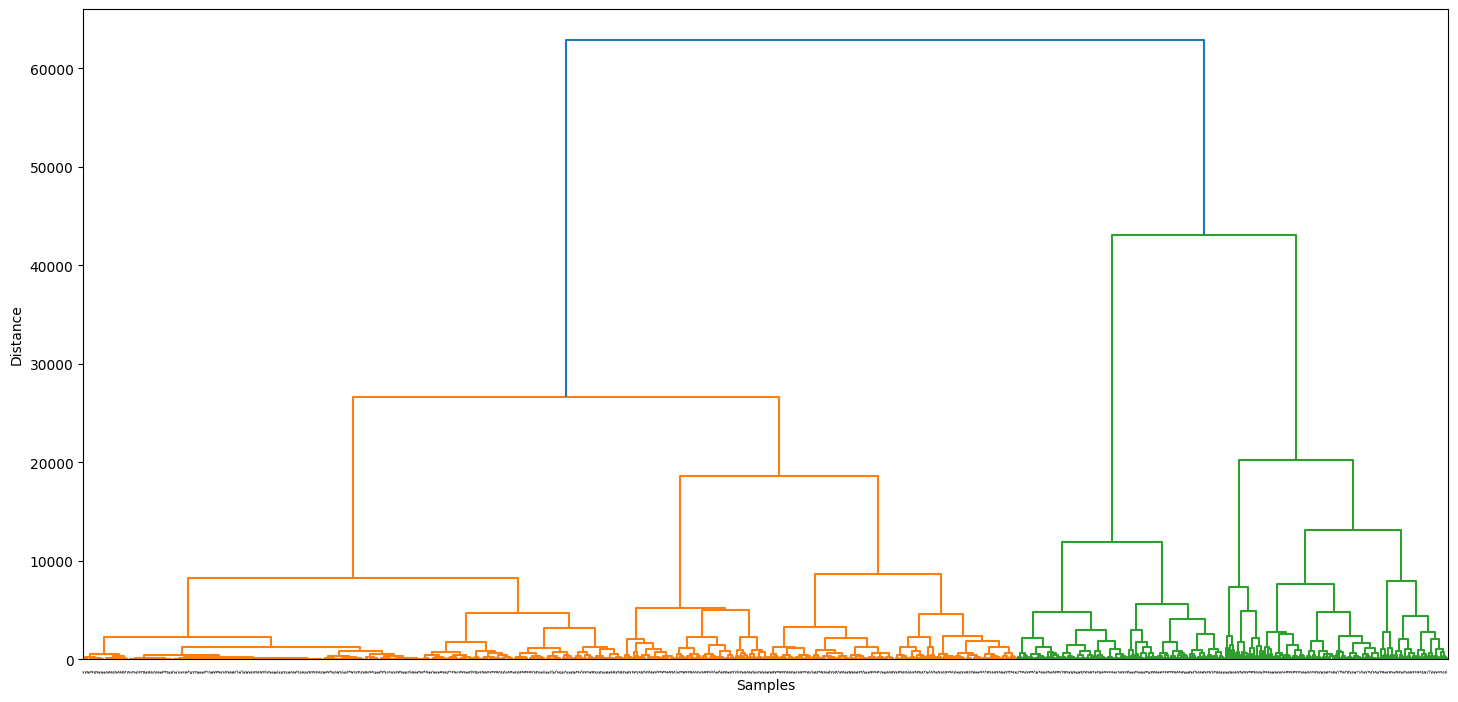

In [13]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(cluster4)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cluster4[label == i , 0] , cluster4[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()

cluster4_samples = linkage(cluster4, method='ward', metric='euclidean')

plt.figure(figsize=(15,10))
ax = plt.subplot()
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95,
wspace=0, hspace=0)
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(cluster4_samples, leaf_rotation=90., leaf_font_size=1.)
plt.savefig('dendrogram4_4_samples_yl.pdf')

cluster8 = cluster4[label == 0]
print("Cluster 8 has", len(cluster8), "genes", sep = " ")

cluster9 = cluster4[label == 1]
print("Cluster 9 has", len(cluster9), "genes", sep = " ")

cluster10 = cluster4[label == 2]
print("Cluster 10 has", len(cluster10), "genes", sep = " ")

cluster11 = cluster4[label == 3]
print("Cluster 11 has", len(cluster11), "genes", sep = " ")

 # Kernel PCA comparison

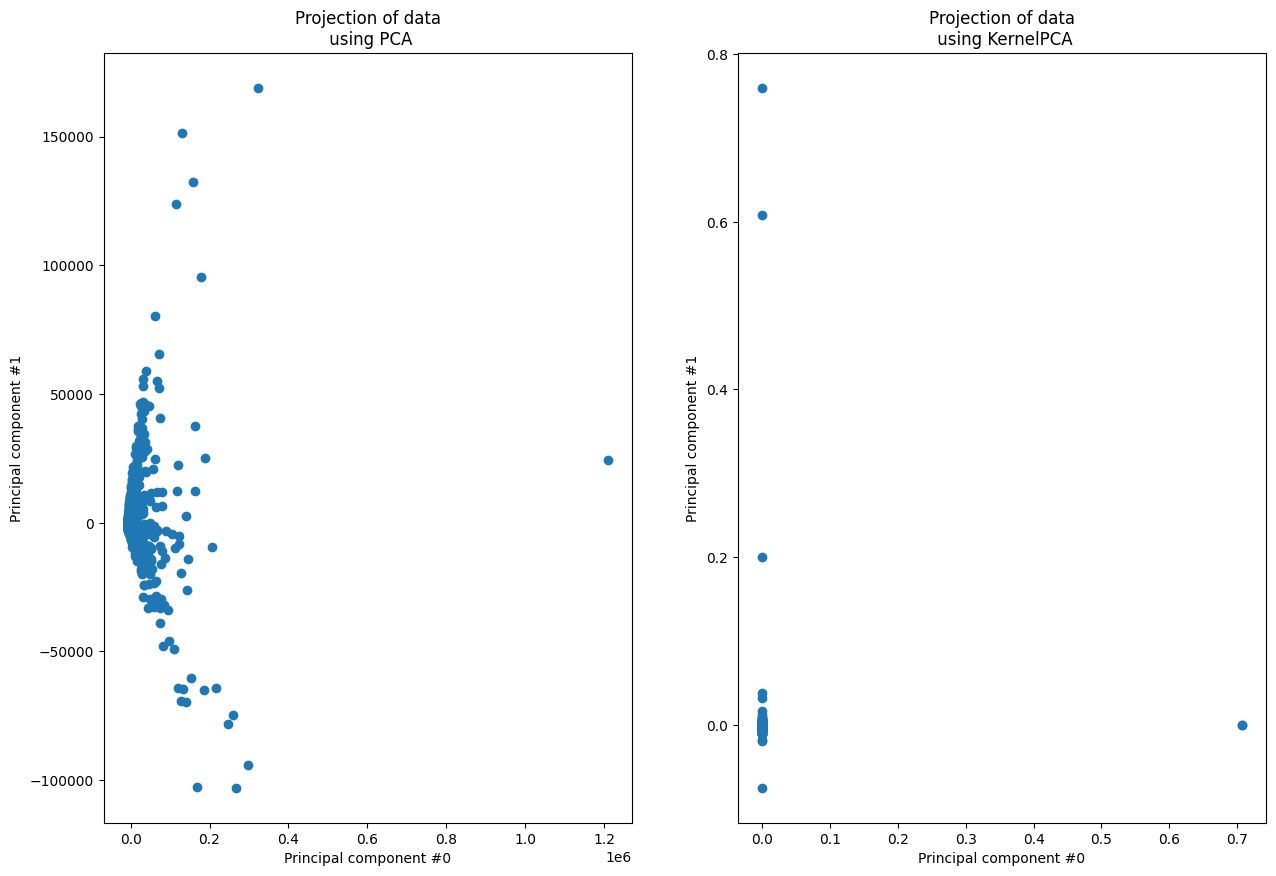

In [14]:
pca = PCA(n_components=2)
rbf_kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1, random_state=3009
)

counts_pca = pca.fit(counts).transform(counts)
rbf_counts_kernel_pca = rbf_kernel_pca.fit(counts).transform(counts)

fig, (pca_proj_ax, rbf_counts_kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(15,10)
)

pca_proj_ax.scatter(counts_pca[:, 0], counts_pca[:, 1])
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of data\n using PCA")

rbf_counts_kernel_pca_proj_ax.scatter(rbf_counts_kernel_pca[:, 0], rbf_counts_kernel_pca[:, 1])
rbf_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
rbf_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = rbf_counts_kernel_pca_proj_ax.set_title("Projection of data\n using KernelPCA")

 Polynomial KPCA

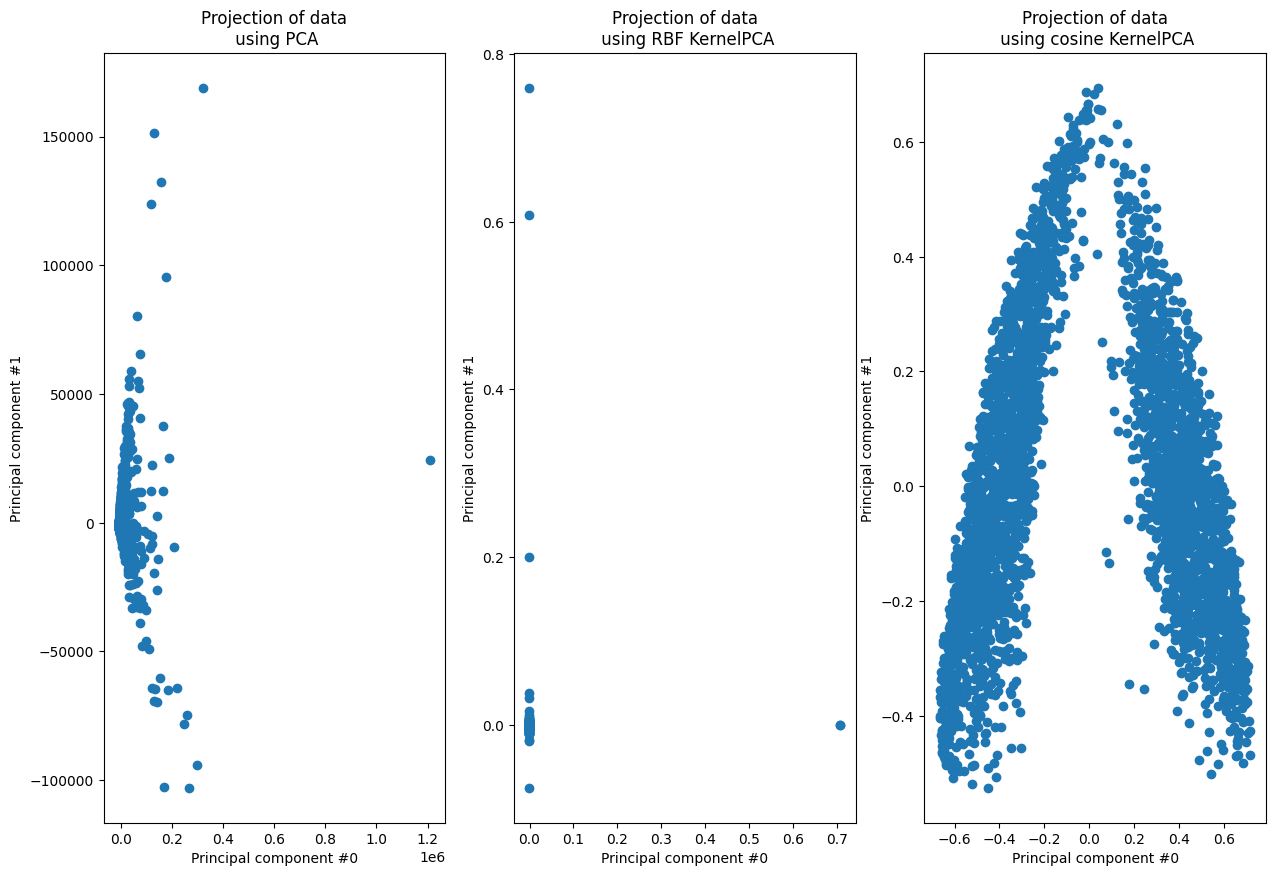

In [15]:
pca = PCA(n_components=2)

# lin_kernel_pca = KernelPCA(
#     n_components=None, kernel="linear", gamma=10, fit_inverse_transform=True, alpha=0.1
# )

# sig_kernel_pca = KernelPCA(
#     n_components=None, kernel="sigmoid", gamma=10, fit_inverse_transform=True, alpha=0.1
# )

cos_kernel_pca = KernelPCA(
    n_components=None, kernel="cosine", gamma=10, fit_inverse_transform=True, alpha=0.1
)

rbf_kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

counts_pca = pca.fit(counts).transform(counts)
# lin_counts_kernel_pca = lin_kernel_pca.fit(counts).transform(counts)
# sig_counts_kernel_pca = sig_kernel_pca.fit(counts).transform(counts)
cos_counts_kernel_pca = cos_kernel_pca.fit(counts).transform(counts)
rbf_counts_kernel_pca = rbf_kernel_pca.fit(counts).transform(counts)

fig, (pca_proj_ax, rbf_counts_kernel_pca_proj_ax, cos_counts_kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(15,10) )

pca_proj_ax.scatter(counts_pca[:, 0], counts_pca[:, 1])
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of data\n using PCA")

rbf_counts_kernel_pca_proj_ax.scatter(rbf_counts_kernel_pca[:, 0], rbf_counts_kernel_pca[:, 1])
rbf_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
rbf_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = rbf_counts_kernel_pca_proj_ax.set_title("Projection of data\n using RBF KernelPCA")

# sig_counts_kernel_pca_proj_ax.scatter(sig_counts_kernel_pca[:, 0], sig_counts_kernel_pca[:, 1])
# sig_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
# sig_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
# _ = sig_counts_kernel_pca_proj_ax.set_title("Projection of data\n using Sigmoid KernelPCA")

# lin_counts_kernel_pca_proj_ax.scatter(lin_counts_kernel_pca[:, 0], lin_counts_kernel_pca[:, 1])
# lin_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
# lin_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
# _ = lin_counts_kernel_pca_proj_ax.set_title("Projection of data\n using linear KernelPCA")

cos_counts_kernel_pca_proj_ax.scatter(cos_counts_kernel_pca[:, 0], cos_counts_kernel_pca[:, 1])
cos_counts_kernel_pca_proj_ax.set_ylabel("Principal component #1")
cos_counts_kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = cos_counts_kernel_pca_proj_ax.set_title("Projection of data\n using cosine KernelPCA")

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


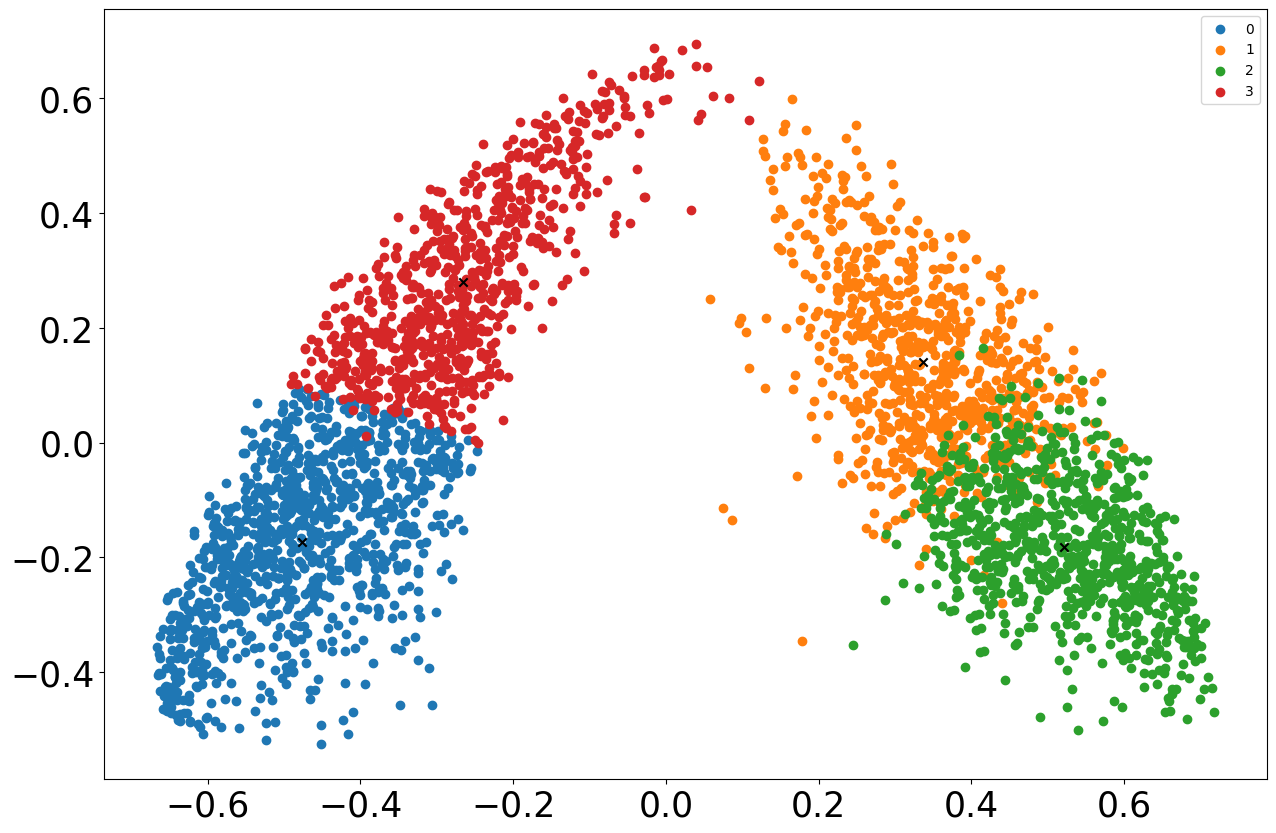

In [16]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="full", random_state=3009)
label = model.fit_predict(cos_counts_kernel_pca)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cos_counts_kernel_pca[label == i , 0] , cos_counts_kernel_pca[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


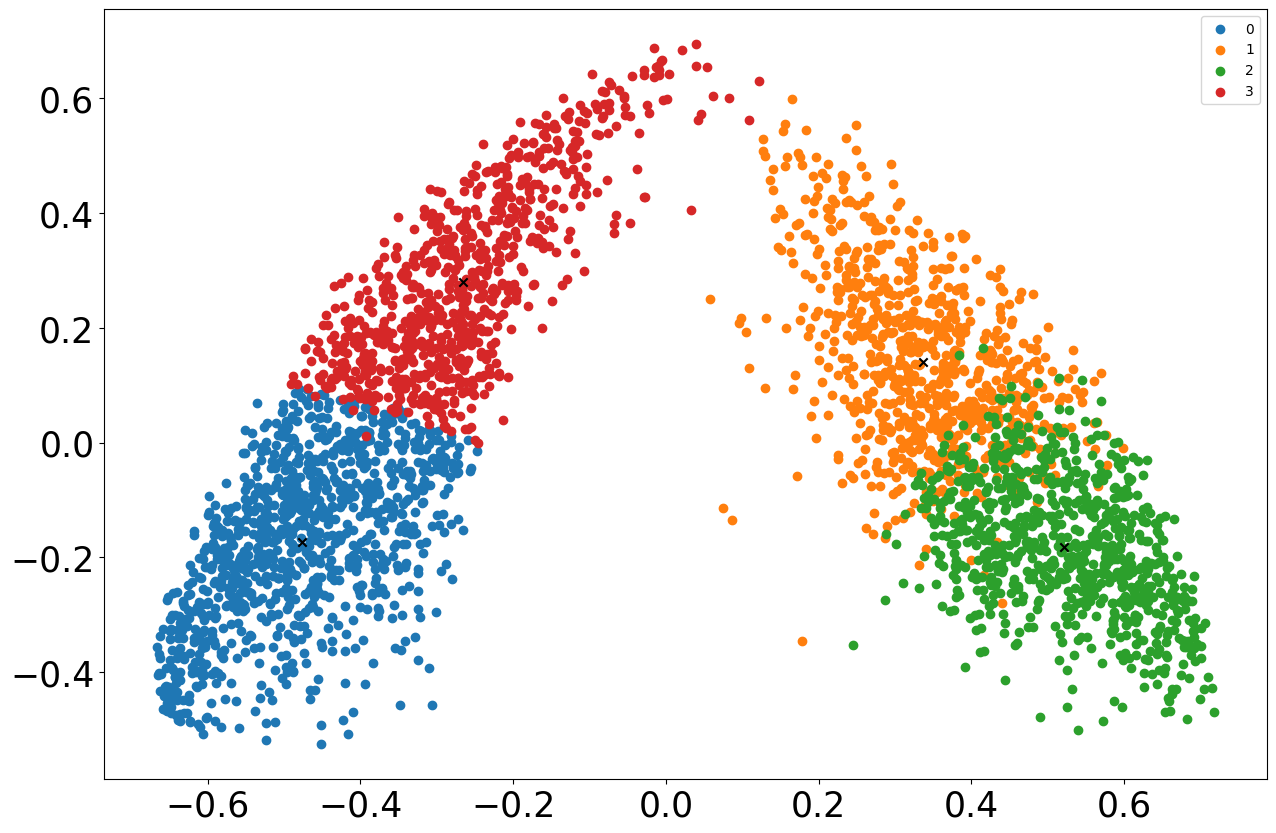

In [17]:
model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(cos_counts_kernel_pca)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(cos_counts_kernel_pca[label == i , 0] , cos_counts_kernel_pca[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend()

plt.savefig('kmeans_elkan_4_kpca_cosine_yl.pdf')

pd.DataFrame(centers).to_csv("cos_4_centers_yl.csv", index=True)

 ### UMAP

In [18]:
# umap = UMAP(n_components=2, learning_rate='auto', init='random', random_state=3009).fit_transform(counts)
# umap.shape

# plt.figure(figsize=(15,10))
# sns.scatterplot(
#     x=tsne[:,0], y=tsne[:,1],
#     # hue="y",
#     palette=sns.color_palette("hls", 10),
#     data=counts,
#     legend="full",
#     alpha=0.3
# )
# plt.savefig('tsne_yl.pdf')

# model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
# label = model.fit_predict(tsne)
# centers = np.array(model.cluster_centers_)
# plt.figure(figsize=(15,10))
# uniq = np.unique(label)
# for i in uniq:
#    plt.scatter(tsne[label == i , 0] , tsne[label == i , 1] , label = i)
# plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
# plt.xlim([-60,60])
# plt.ylim([-70,80])
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
# # find the centroid for each cluster
# plt.legend(fontsize=25, markerscale=5, loc =2)
# plt.savefig('kmeans_elkan_4_tsne_yl.pdf')
# #%%
# tsne_cluster0 = df[model.labels_==0] 
# len(tsne_cluster0)
# tsne_cluster1 = df[model.labels_==1]
# len(tsne_cluster1)
# tsne_cluster2 = df[model.labels_==2]
# len(tsne_cluster2)
# tsne_cluster3 = df[model.labels_==3]
# len(tsne_cluster3)

# #%%

# nbrs = NearestNeighbors(n_neighbors=4)
# nbrs.fit(tsne)

# neighbors_f_id = nbrs.kneighbors_graph(X = centers, n_neighbors = 1).indices

# Ncenter0 = df.iloc[[neighbors_f_id[0],]]
# Ncenter1 = df.iloc[[neighbors_f_id[1],]]
# Ncenter2 = df.iloc[[neighbors_f_id[2],]]
# Ncenter3 = df.iloc[[neighbors_f_id[3],]]

# Ncenters = [Ncenter0, Ncenter1, Ncenter2, Ncenter3]
# Ncenters = pd.concat(Ncenters)

# Ncenters_t = np.transpose(Ncenters)
# ax = Ncenters_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=1,legend = False)
# fig = ax[0].get_figure()
# plt.rcParams['font.size'] = 25
# fig.savefig('yl_Ncenters_t_axis_bar.pdf')

 ### Isomap

 ### T-SNE

<ipython-input-19-823519f96a52>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


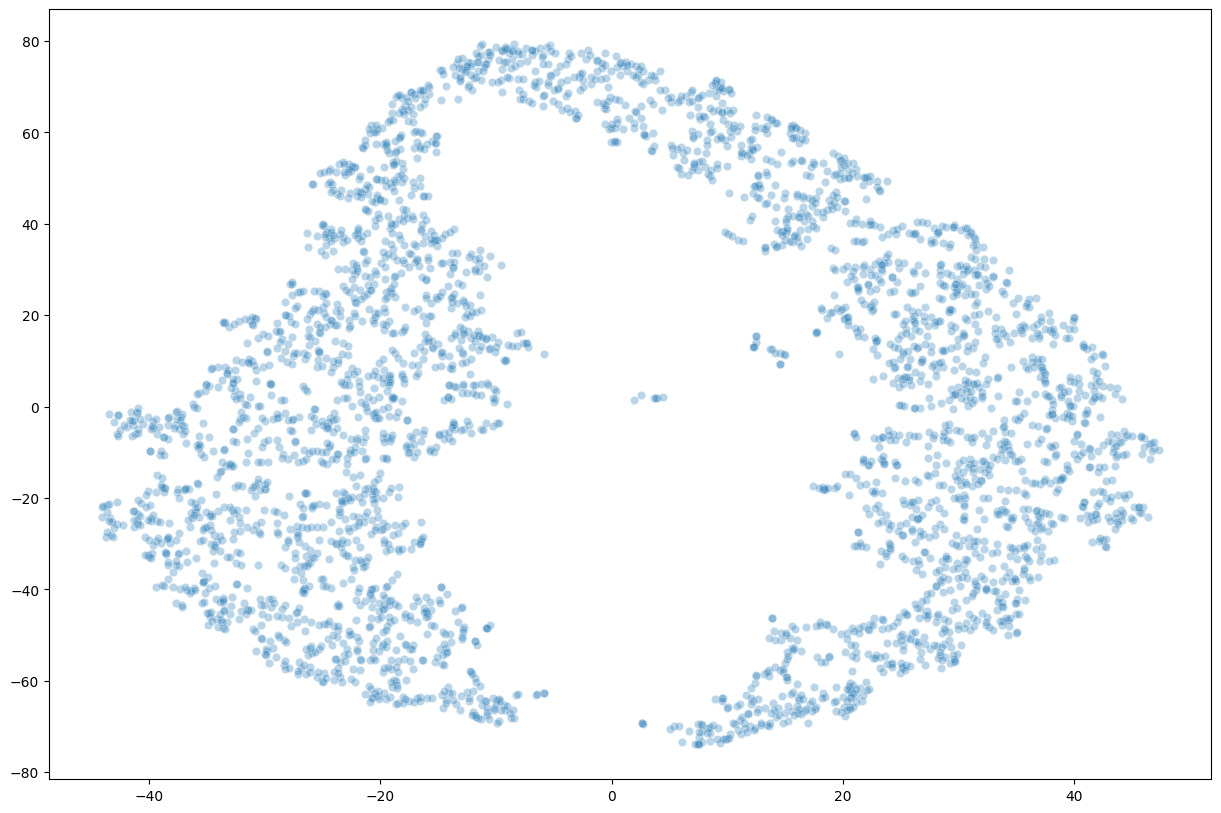

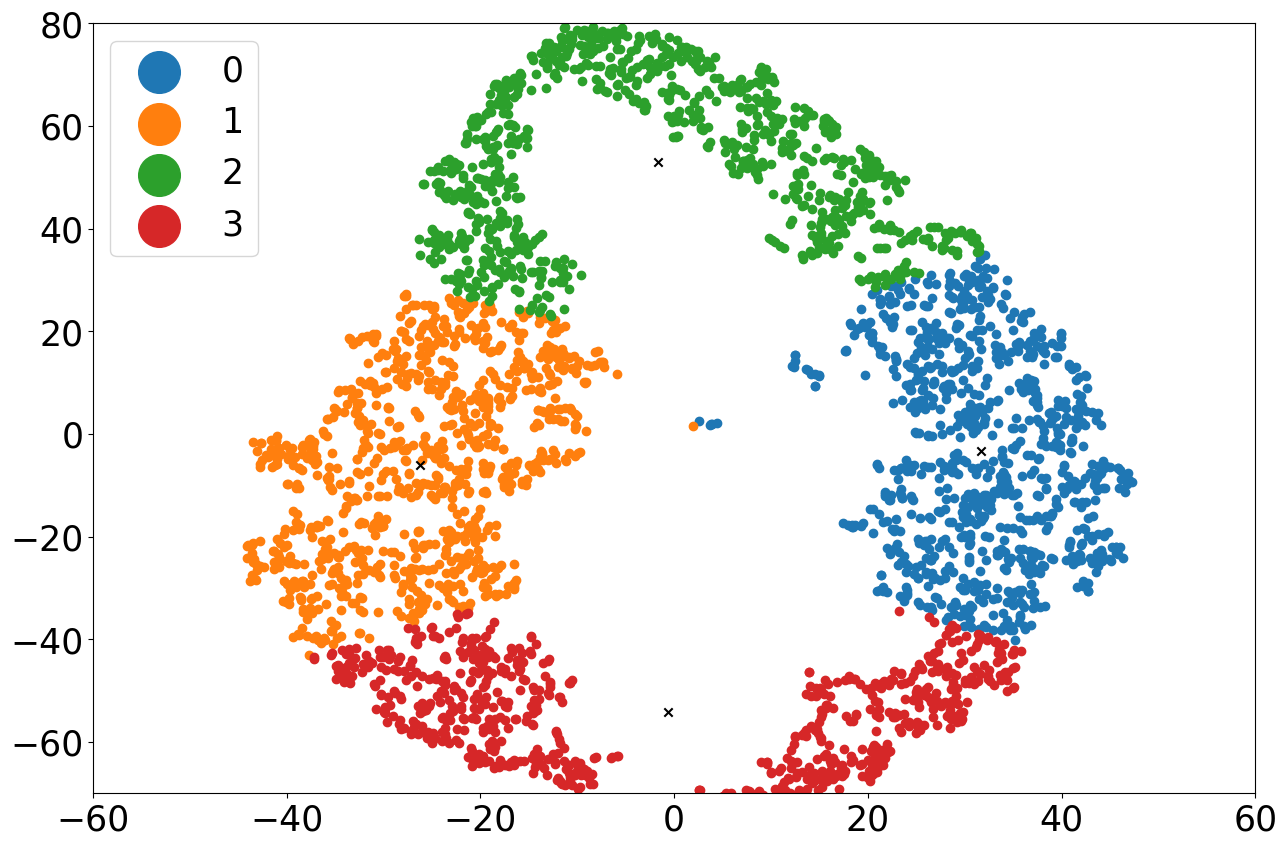

In [19]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=3009).fit_transform(counts)
tsne.shape

plt.figure(figsize=(15,10))
sns.scatterplot(
    x=tsne[:,0], y=tsne[:,1],
    # hue="y",
    palette=sns.color_palette("hls", 10),
    data=counts,
    legend="full",
    alpha=0.3
)
plt.savefig('tsne_yl.pdf')

model = KMeans(n_clusters = 4, init = "k-means++", algorithm="elkan", random_state=3009)
label = model.fit_predict(tsne)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(15,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(tsne[label == i , 0] , tsne[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.xlim([-60,60])
plt.ylim([-70,80])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# find the centroid for each cluster
plt.legend(fontsize=25, markerscale=5, loc =2)
plt.savefig('kmeans_elkan_4_tsne_yl.pdf')

In [20]:
tsne_cluster0 = df[model.labels_==0] 
len(tsne_cluster0)
tsne_cluster1 = df[model.labels_==1]
len(tsne_cluster1)
tsne_cluster2 = df[model.labels_==2]
len(tsne_cluster2)
tsne_cluster3 = df[model.labels_==3]
len(tsne_cluster3)

734

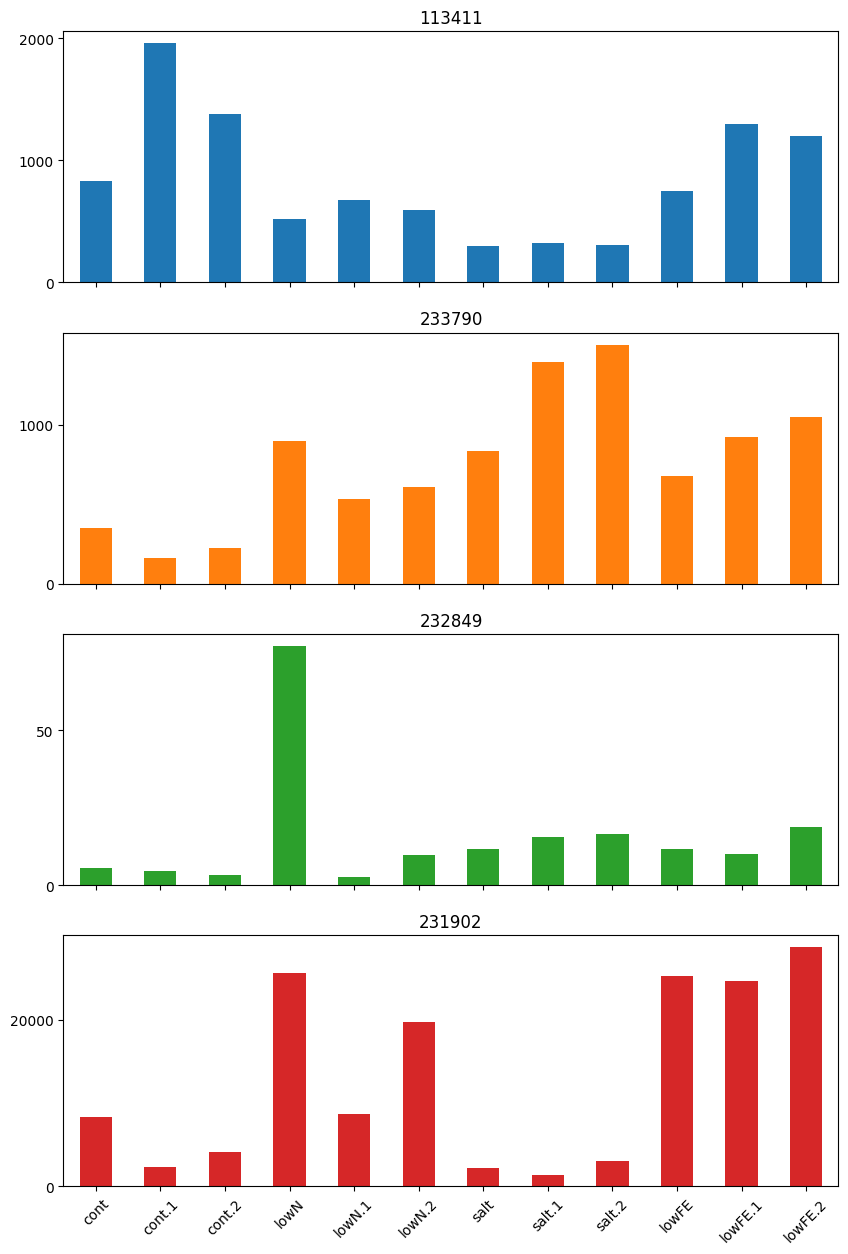

In [21]:
nbrs = NearestNeighbors(n_neighbors=4)
nbrs.fit(tsne)

neighbors_f_id = nbrs.kneighbors_graph(X = centers, n_neighbors = 1).indices

Ncenter0 = df.iloc[[neighbors_f_id[0],]]
Ncenter1 = df.iloc[[neighbors_f_id[1],]]
Ncenter2 = df.iloc[[neighbors_f_id[2],]]
Ncenter3 = df.iloc[[neighbors_f_id[3],]]

Ncenters = [Ncenter0, Ncenter1, Ncenter2, Ncenter3]
Ncenters = pd.concat(Ncenters)

Ncenters_t = np.transpose(Ncenters)
ax = Ncenters_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('yl_Ncenters_t_axis_bar.pdf')

In [22]:
yl_mean_Ncenters_collapsedreps = pd.DataFrame()
yl_mean_Ncenters_collapsedreps.loc[0,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[0].mean()
yl_mean_Ncenters_collapsedreps.loc[0,1] = Ncenters[['lowN', 'lowN.1', 'lowN.2']].iloc[0].mean()
yl_mean_Ncenters_collapsedreps.loc[0,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[0].mean()
yl_mean_Ncenters_collapsedreps.loc[0,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[0].mean()
yl_mean_Ncenters_collapsedreps.loc[0,4] = Ncenters.index[0]

yl_mean_Ncenters_collapsedreps.loc[1,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[1].mean()
yl_mean_Ncenters_collapsedreps.loc[1,1] = Ncenters[['lowN', 'lowN.1', 'lowN.2']].iloc[1].mean()
yl_mean_Ncenters_collapsedreps.loc[1,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[1].mean()
yl_mean_Ncenters_collapsedreps.loc[1,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[1].mean()
yl_mean_Ncenters_collapsedreps.loc[1,4] = Ncenters.index[1]


yl_mean_Ncenters_collapsedreps.loc[2,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[2].mean()
yl_mean_Ncenters_collapsedreps.loc[2,1] = Ncenters[['lowN', 'lowN.1', 'lowN.2']].iloc[2].mean()
yl_mean_Ncenters_collapsedreps.loc[2,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[2].mean()
yl_mean_Ncenters_collapsedreps.loc[2,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[2].mean()
yl_mean_Ncenters_collapsedreps.loc[2,4] = Ncenters.index[2]


yl_mean_Ncenters_collapsedreps.loc[3,0] = Ncenters[['cont', 'cont.1', 'cont.2']].iloc[3].mean()
yl_mean_Ncenters_collapsedreps.loc[3,1] = Ncenters[['lowN', 'lowN.1', 'lowN.2']].iloc[3].mean()
yl_mean_Ncenters_collapsedreps.loc[3,2] = Ncenters[['salt', 'salt.1', 'salt.2']].iloc[3].mean()
yl_mean_Ncenters_collapsedreps.loc[3,3] = Ncenters[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[3].mean()
yl_mean_Ncenters_collapsedreps.loc[3,4] = Ncenters.index[3]


yl_mean_Ncenters_collapsedreps.columns = ['cont','lowN','salt','lowFE','proteinId']
yl_mean_Ncenters_collapsedreps.index = ['c0', 'c1', 'c2', 'c3']
yl_mean_Ncenters_collapsedreps.to_csv("yl_Ncenters_4_collapsedreps.csv", index=True)

yl_mean_Ncenters_collapsedreps

,cont,lowN,salt,lowFE,proteinId
c0,1388.844647,594.531234,307.103299,1079.700639,113411.0
c1,246.813425,679.159274,1243.152862,882.059602,233790.0
c2,4.477902,29.896492,14.599966,13.470383,232849.0
c3,4909.606144,17971.396552,2228.048589,26164.255657,231902.0


In [23]:
ylDEGs = pd.read_csv('~/ic/Documents/WPI/Young/data/yl/output/all_annotation_yl.csv')
ylDEGs = ylDEGs[["proteinId","lowN_log2FC.x","salt_log2FC.x","lowFE_log2FC.x"]]

yl_mean_Ncenters_collapsedreps_FC = pd.merge(yl_mean_Ncenters_collapsedreps, ylDEGs, on = 'proteinId')

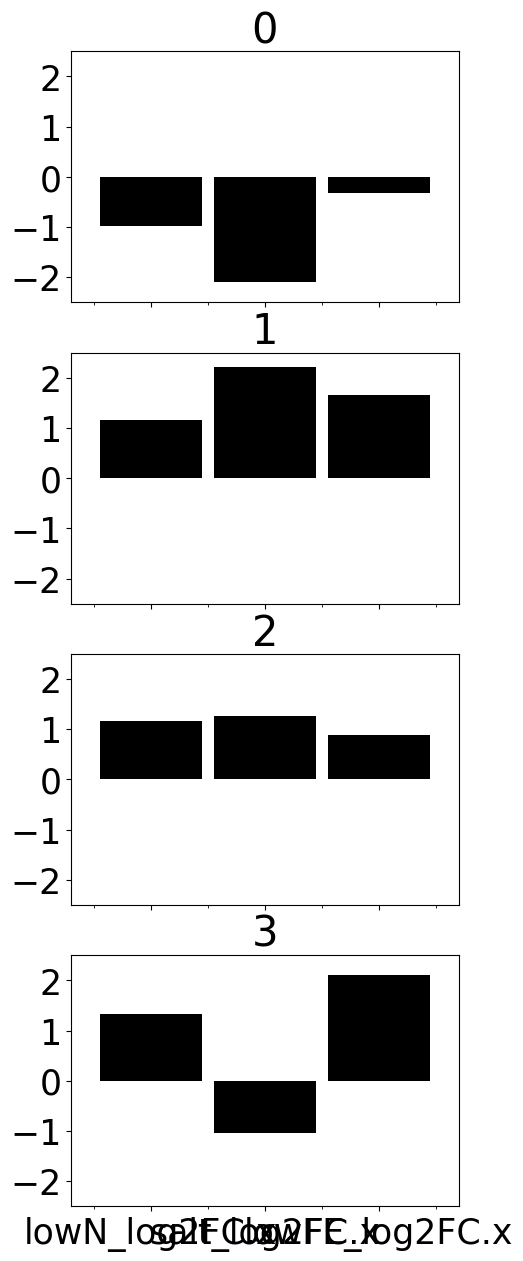

In [24]:
yl_Ncenters_collapsedreps_FC = yl_mean_Ncenters_collapsedreps_FC[["lowN_log2FC.x","salt_log2FC.x","lowFE_log2FC.x"]]

mean_Ncenters_t = np.transpose(yl_Ncenters_collapsedreps_FC)
ax = mean_Ncenters_t.plot.bar(rot=0, subplots = True, ylim=(-2.5,2.5),figsize=(5,15), width = 0.9, color = ["black"],linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 10
fig.savefig('yl_Ncenters_FC_collapsedreps_bar.pdf')

# mean_Ncenters_t = np.transpose(yl_Ncenters_collapsedreps_FC)
# ax = mean_Ncenters_t.plot.bar(rot=0, subplots = True, ylim=(0,6000), figsize=(5,15), width = 0.9, color = ["black"], linewidth=1,legend = False)
# fig = ax[0].get_figure()
# plt.rcParams['font.size'] = 25
# fig.savefig('yl_Ncenters_FC_collapsedreps_bar_6000.pdf')

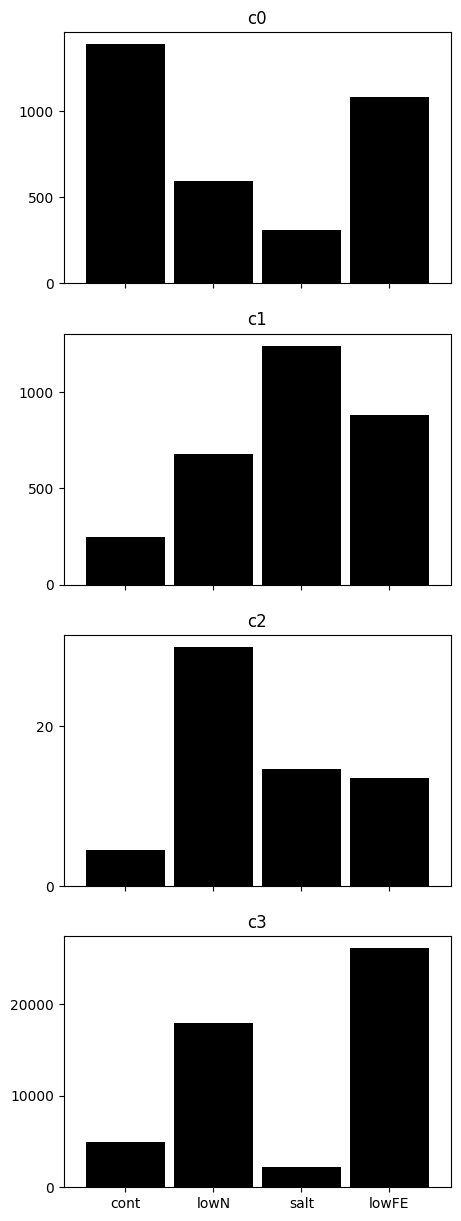

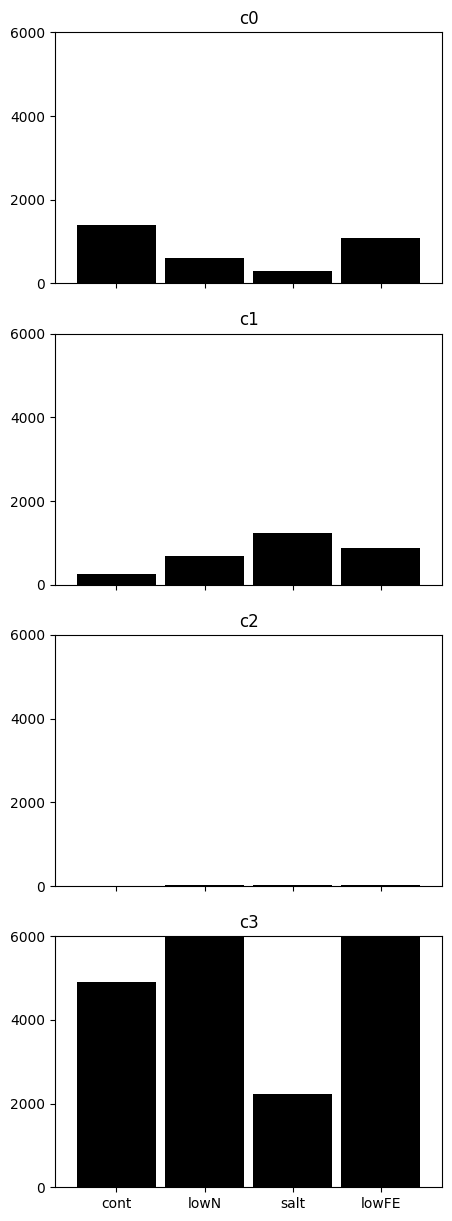

In [25]:
yl_mean_Ncenters_collapsedreps = yl_mean_Ncenters_collapsedreps[["cont", "lowN", "salt", "lowFE"]]
mean_Ncenters_t = np.transpose(yl_mean_Ncenters_collapsedreps)
ax = mean_Ncenters_t.plot.bar(rot=0, subplots = True, figsize=(5,15), width = 0.9, color = ["black"],linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 10
fig.savefig('yl_Ncenters_t_collapsedreps_bar.pdf')

mean_Ncenters_t = np.transpose(yl_mean_Ncenters_collapsedreps)
ax = mean_Ncenters_t.plot.bar(rot=0, subplots = True, ylim=(0,6000), figsize=(5,15), width = 0.9, color = ["black"], linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('yl_Ncenters_t_collapsedreps_bar_6000.pdf')

In [26]:
pd.DataFrame(centers).to_csv("tsne_4_centers_yl.csv", index=True)

In [27]:
cluster0 = pd.DataFrame()
cluster0 = df[model.labels_==0]
cluster0.to_csv("cluster0_4_yl.csv", index=True)
cluster0_mean = pd.DataFrame()
cluster0_mean.loc[0,0] = cluster0['cont'].mean()
cluster0_mean.loc[0,1] = cluster0['cont.1'].mean()
cluster0_mean.loc[0,2] = cluster0['cont.2'].mean()
cluster0_mean.loc[0,3] = cluster0['lowN'].mean()
cluster0_mean.loc[0,4] = cluster0['lowN.1'].mean()
cluster0_mean.loc[0,5] = cluster0['lowN.2'].mean()
cluster0_mean.loc[0,6] = cluster0['salt'].mean()
cluster0_mean.loc[0,7] = cluster0['salt.1'].mean()
cluster0_mean.loc[0,8] = cluster0['salt.2'].mean()
cluster0_mean.loc[0,9] = cluster0['lowFE'].mean()
cluster0_mean.loc[0,10] = cluster0['lowFE.1'].mean()
cluster0_mean.loc[0,11] = cluster0['lowFE.2'].mean()
# cluster0_mean.to_csv("cluster0_mean_yl.csv", index=True)

cluster1 = pd.DataFrame()
cluster1 = df[model.labels_==1]
cluster1.to_csv("cluster1_4_yl.csv", index=True)
cluster1_mean = pd.DataFrame()
cluster1_mean.loc[0,0] = cluster1['cont'].mean()
cluster1_mean.loc[0,1] = cluster1['cont.1'].mean()
cluster1_mean.loc[0,2] = cluster1['cont.2'].mean()
cluster1_mean.loc[0,3] = cluster1['lowN'].mean()
cluster1_mean.loc[0,4] = cluster1['lowN.1'].mean()
cluster1_mean.loc[0,5] = cluster1['lowN.2'].mean()
cluster1_mean.loc[0,6] = cluster1['salt'].mean()
cluster1_mean.loc[0,7] = cluster1['salt.1'].mean()
cluster1_mean.loc[0,8] = cluster1['salt.2'].mean()
cluster1_mean.loc[0,9] = cluster1['lowFE'].mean()
cluster1_mean.loc[0,10] = cluster1['lowFE.1'].mean()
cluster1_mean.loc[0,11] = cluster1['lowFE.2'].mean()
# cluster1_mean.to_csv("cluster1_mean_yl.csv", index=True)

cluster2 = pd.DataFrame()
cluster2 = df[model.labels_==2]
cluster2.to_csv("cluster2_4_yl.csv", index=True)
cluster2_mean = pd.DataFrame()
cluster2_mean.loc[0,0] = cluster2['cont'].mean()
cluster2_mean.loc[0,1] = cluster2['cont.1'].mean()
cluster2_mean.loc[0,2] = cluster2['cont.2'].mean()
cluster2_mean.loc[0,3] = cluster2['lowN'].mean()
cluster2_mean.loc[0,4] = cluster2['lowN.1'].mean()
cluster2_mean.loc[0,5] = cluster2['lowN.2'].mean()
cluster2_mean.loc[0,6] = cluster2['salt'].mean()
cluster2_mean.loc[0,7] = cluster2['salt.1'].mean()
cluster2_mean.loc[0,8] = cluster2['salt.2'].mean()
cluster2_mean.loc[0,9] = cluster2['lowFE'].mean()
cluster2_mean.loc[0,10] = cluster2['lowFE.1'].mean()
cluster2_mean.loc[0,11] = cluster2['lowFE.2'].mean()
# cluster2_mean.to_csv("cluster2_mean_yl.csv", index=True)

cluster3 = pd.DataFrame()
cluster3 = df[model.labels_==3]
cluster3.to_csv("cluster3_4_yl.csv", index=True)
cluster3_mean = pd.DataFrame()
cluster3_mean.loc[0,0] = cluster3['cont'].mean()
cluster3_mean.loc[0,1] = cluster3['cont.1'].mean()
cluster3_mean.loc[0,2] = cluster3['cont.2'].mean()
cluster3_mean.loc[0,3] = cluster3['lowN'].mean()
cluster3_mean.loc[0,4] = cluster3['lowN.1'].mean()
cluster3_mean.loc[0,5] = cluster3['lowN.2'].mean()
cluster3_mean.loc[0,6] = cluster3['salt'].mean()
cluster3_mean.loc[0,7] = cluster3['salt.1'].mean()
cluster3_mean.loc[0,8] = cluster3['salt.2'].mean()
cluster3_mean.loc[0,9] = cluster3['lowFE'].mean()
cluster3_mean.loc[0,10] = cluster3['lowFE.1'].mean()
cluster3_mean.loc[0,11] = cluster3['lowFE.2'].mean()
# cluster3_mean.to_csv("cluster3_mean_yl.csv", index=True)

In [28]:
yl_cluster_size = pd.DataFrame()
yl_cluster_size.loc[0,0] = "cluster_0"
yl_cluster_size.loc[0,1] = len(cluster0)

yl_cluster_size.loc[1,0] = "cluster_1"
yl_cluster_size.loc[1,1] = len(cluster1)

yl_cluster_size.loc[2,0] = "cluster_2"
yl_cluster_size.loc[2,1] = len(cluster2)

yl_cluster_size.loc[3,0] = "cluster_3"
yl_cluster_size.loc[3,1] = len(cluster3)

yl_cluster_size
yl_cluster_size.to_csv("cluster_4_size_yl.csv", index=True)

In [29]:
yl_clusters = [cluster0_mean, cluster1_mean, cluster2_mean, cluster3_mean]

yl_mean = pd.concat(yl_clusters)
yl_mean.index = ['c0', 'c1', 'c2', 'c3']
yl_mean.columns = [features]
# yl_mean = yl_mean.rename_axis(index='clusters', columns='features')
yl_mean

yl_mean.to_csv("mean_4_yl.csv", index=True)

In [30]:
yl_mean_collapsedreps = pd.DataFrame()
yl_mean_collapsedreps.loc[0,0] = yl_mean[['cont', 'cont.1', 'cont.2']].iloc[0].mean()
yl_mean_collapsedreps.loc[0,1] = yl_mean[['lowN', 'lowN.1', 'lowN.2']].iloc[0].mean()
yl_mean_collapsedreps.loc[0,2] = yl_mean[['salt', 'salt.1', 'salt.2']].iloc[0].mean()
yl_mean_collapsedreps.loc[0,3] = yl_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[0].mean()

yl_mean_collapsedreps.loc[1,0] = yl_mean[['cont', 'cont.1', 'cont.2']].iloc[1].mean()
yl_mean_collapsedreps.loc[1,1] = yl_mean[['lowN', 'lowN.1', 'lowN.2']].iloc[1].mean()
yl_mean_collapsedreps.loc[1,2] = yl_mean[['salt', 'salt.1', 'salt.2']].iloc[1].mean()
yl_mean_collapsedreps.loc[1,3] = yl_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[1].mean()

yl_mean_collapsedreps.loc[2,0] = yl_mean[['cont', 'cont.1', 'cont.2']].iloc[2].mean()
yl_mean_collapsedreps.loc[2,1] = yl_mean[['lowN', 'lowN.1', 'lowN.2']].iloc[2].mean()
yl_mean_collapsedreps.loc[2,2] = yl_mean[['salt', 'salt.1', 'salt.2']].iloc[2].mean()
yl_mean_collapsedreps.loc[2,3] = yl_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[2].mean()

yl_mean_collapsedreps.loc[3,0] = yl_mean[['cont', 'cont.1', 'cont.2']].iloc[3].mean()
yl_mean_collapsedreps.loc[3,1] = yl_mean[['lowN', 'lowN.1', 'lowN.2']].iloc[3].mean()
yl_mean_collapsedreps.loc[3,2] = yl_mean[['salt', 'salt.1', 'salt.2']].iloc[3].mean()
yl_mean_collapsedreps.loc[3,3] = yl_mean[['lowFE', 'lowFE.1', 'lowFE.2']].iloc[3].mean()

yl_mean_collapsedreps.columns = ['cont','lowN','salt','lowFE']
yl_mean_collapsedreps.index = ['c0', 'c1', 'c2', 'c3']
yl_mean_collapsedreps.to_csv("yl_mean_4_collapsedreps.csv", index=True)

yl_mean_collapsedreps

,cont,lowN,salt,lowFE
c0,1608.150945,1140.334289,440.102508,888.730717
c1,420.553234,651.795833,1555.643594,811.467253
c2,79.375183,66.027542,77.727704,71.230790
c3,11103.750581,8586.336707,7338.286002,6219.531360


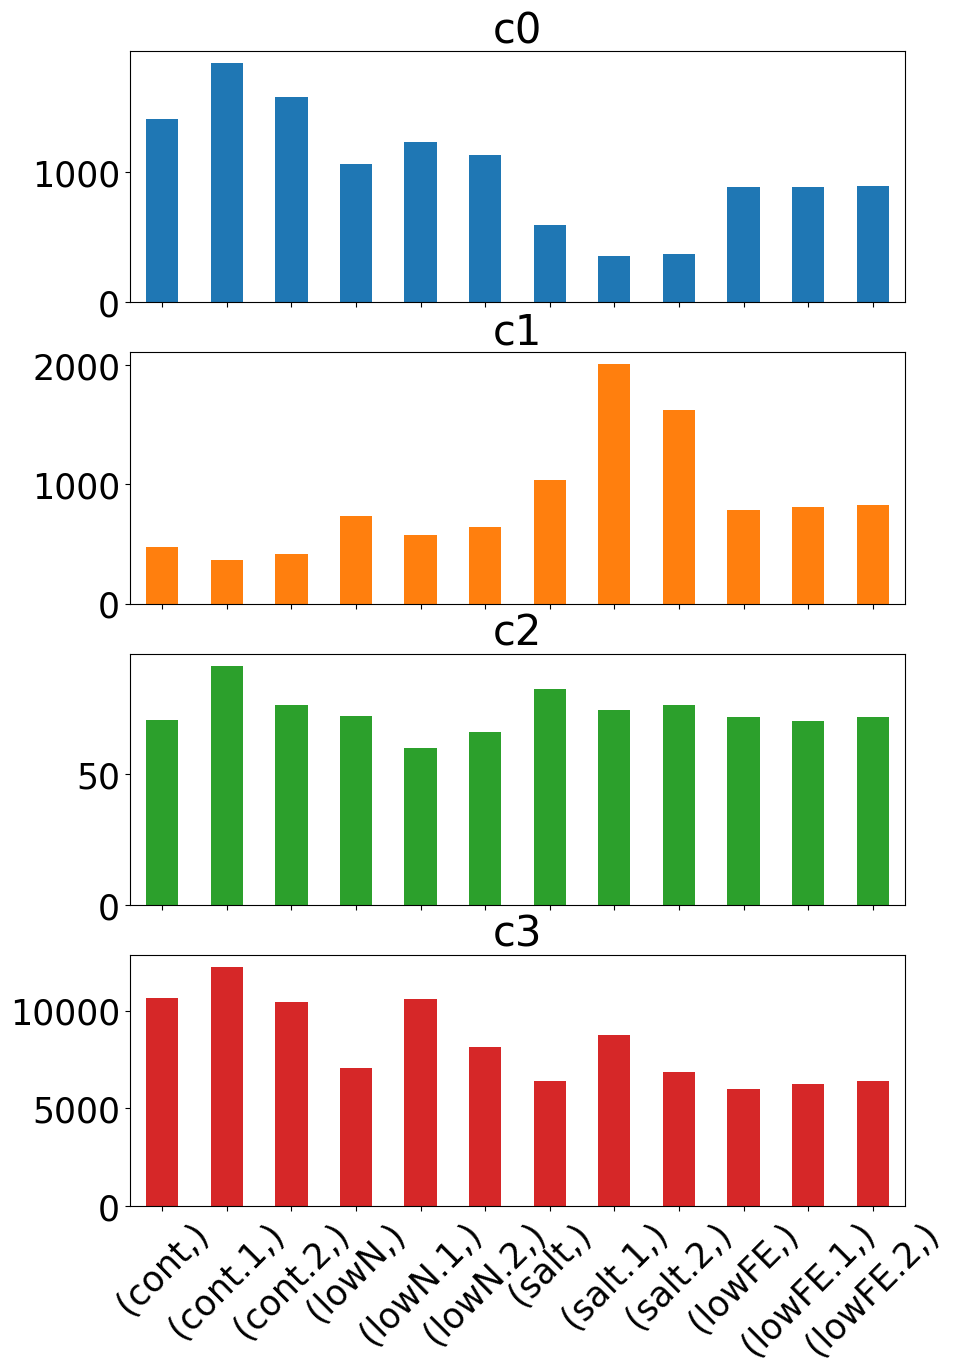

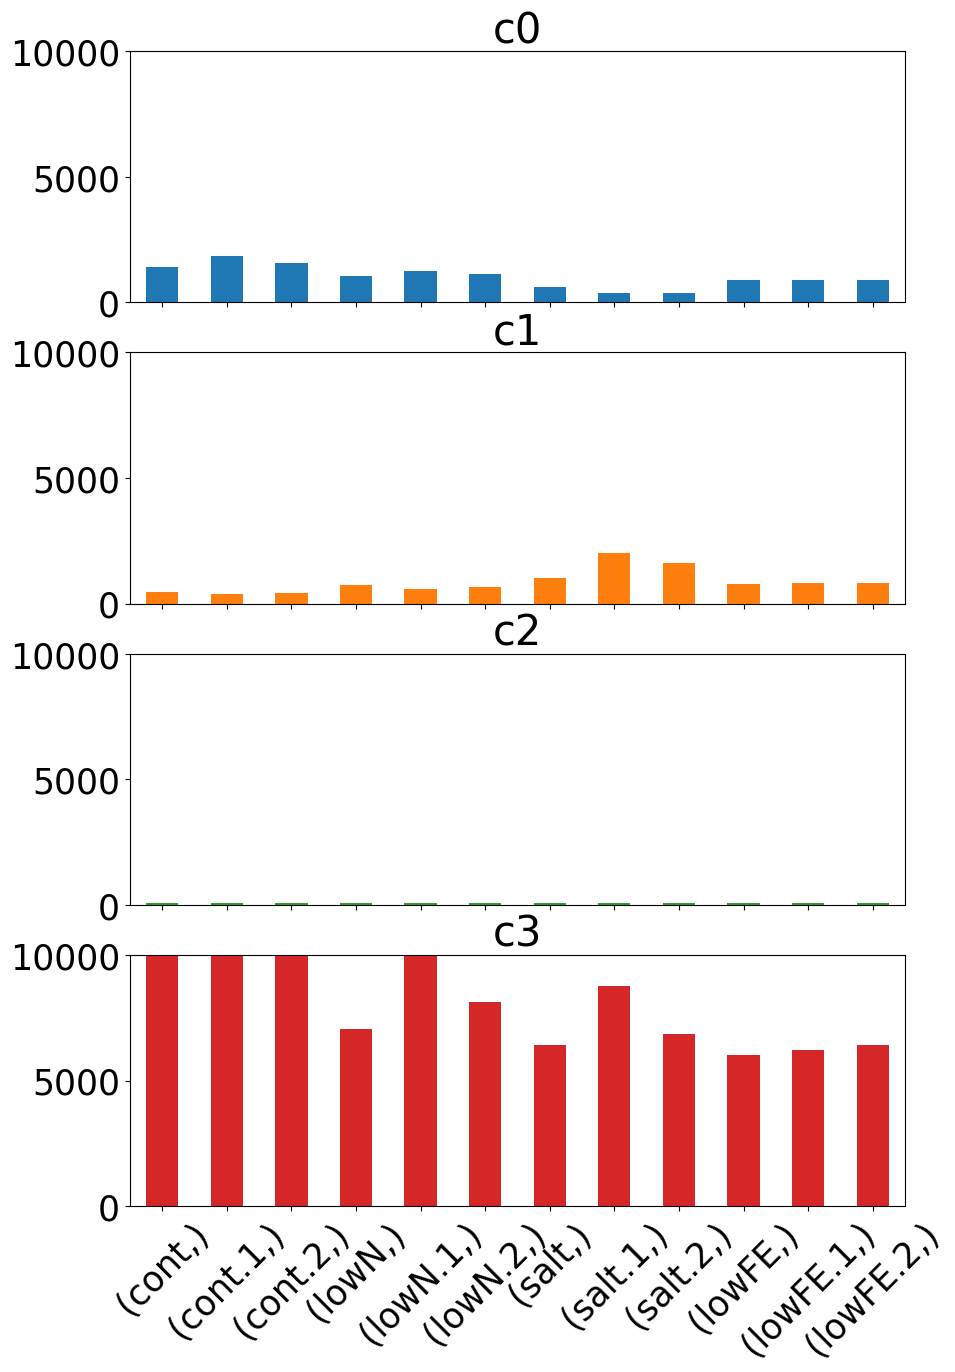

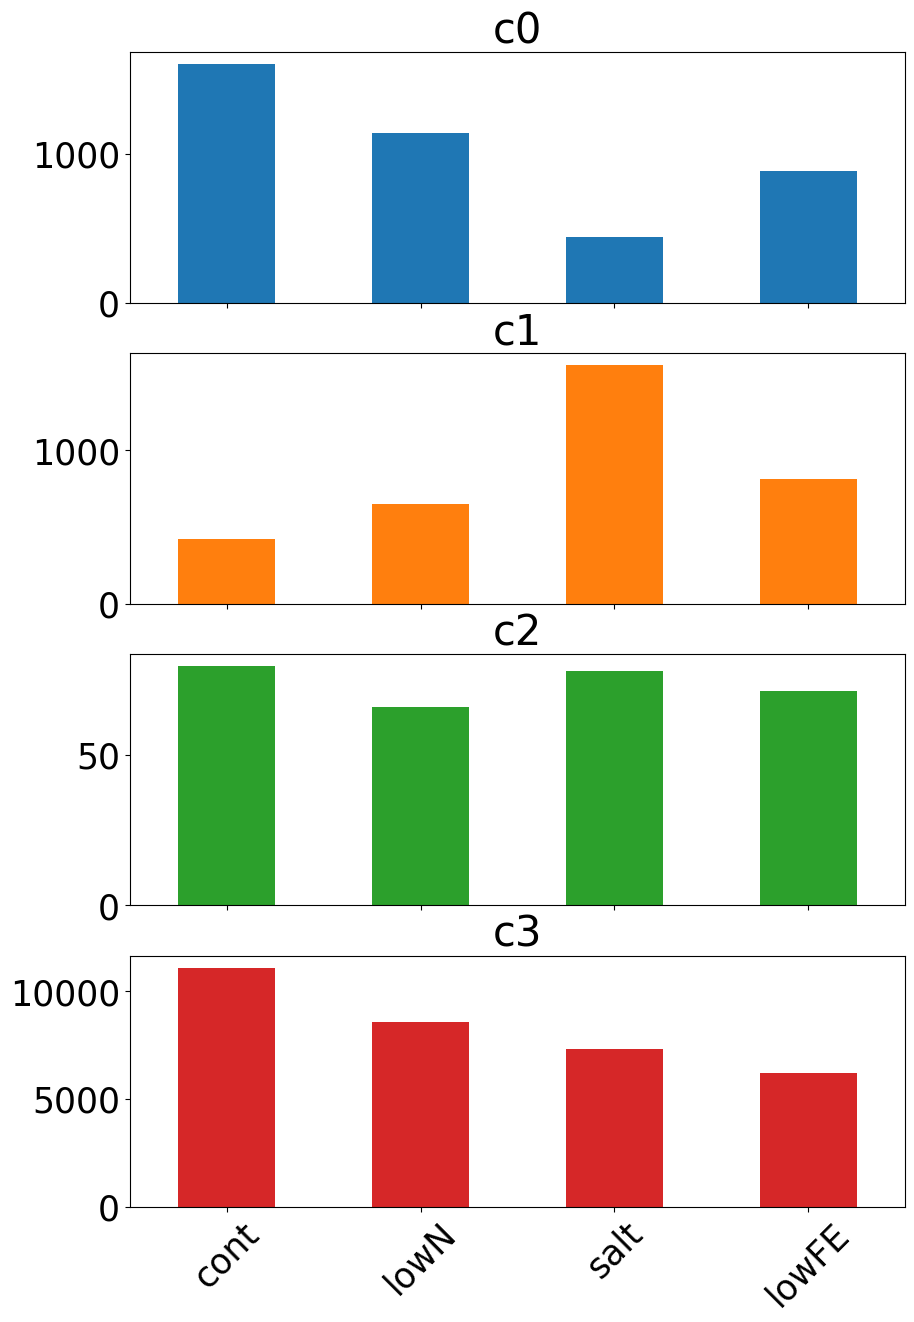

In [31]:
yl_mean_t = np.transpose(yl_mean)
ax = yl_mean_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('yl_mean_4_axis_bar.pdf')

ax = yl_mean_t.plot.bar(rot=45, subplots = True, ylim=(0,10000), figsize=(10,15), linewidth=1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('yl_mean_4_bar.pdf')

yl_mean_collapsedreps_t = np.transpose(yl_mean_collapsedreps)
ax = yl_mean_collapsedreps_t.plot.bar(rot=45, subplots = True, figsize=(10,15), linewidth=0.1,legend = False)
fig = ax[0].get_figure()
plt.rcParams['font.size'] = 25
fig.savefig('yl_mean_4_collapsedreps_bar.pdf')